<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/2348568_ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
column_dtypes = df.dtypes
print(column_dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
nd = df[['age', 'bmi', 'charges']]
nd

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [ ]:
cd=df[['sex','children','smoker','region']]
cd

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_encoded = pd.get_dummies(cd)
Y=nd

In [ ]:
new_df = pd.concat([Y, X_encoded], axis=1)
new_df

,age,bmi,charges,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,3,0,1,1,0,0,1,0,0
1334,18,31.920,2205.98080,0,1,0,1,0,1,0,0,0
1335,18,36.850,1629.83350,0,1,0,1,0,0,0,1,0
1336,21,25.800,2007.94500,0,1,0,1,0,0,0,0,1


In [ ]:
X=new_df.drop('charges',axis=1)
Y1=new_df['charges']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size=0.2, random_state = 42)

In [ ]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,explained_variance_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
# Calculate Adjusted R-squared
n = len(Y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
explained_var = explained_variance_score(Y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Explained Variance Score: {explained_var:.2f}")

Mean Absolute Error: 4181.19
Mean Squared Error: 33596915.85
R-squared (R^2): 0.78
Root Mean Squared Error (RMSE): 5796.28
Adjusted R-squared: 0.77
Explained Variance Score: 0.78


In [ ]:
# Get the coefficients (weights) of the linear regression model
coefficients = model.coef_

# Get the feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute coefficient values in descending order to identify most important features
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted feature importance DataFrame
print(feature_importance_df)


             Feature   Coefficient  Absolute_Coefficient
5          smoker_no -11825.564428          11825.564428
6         smoker_yes  11825.564428          11825.564428
7   region_northeast    459.585244            459.585244
2           children    425.278784            425.278784
10  region_southwest   -350.214110            350.214110
1                bmi    337.092552            337.092552
0                age    256.975706            256.975706
9   region_southeast   -198.279052            198.279052
8   region_northwest     88.907918             88.907918
4           sex_male     -9.295846              9.295846
3         sex_female      9.295846              9.295846


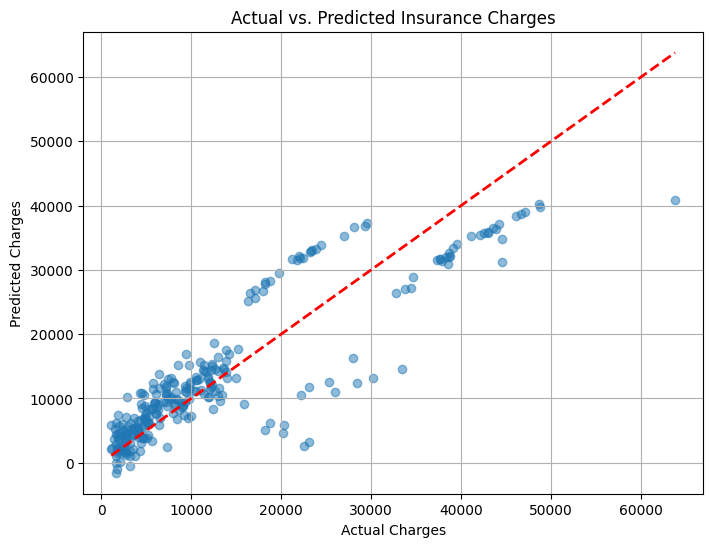

In [ ]:

# Plot the actual vs. predicted insurance charges
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linestyle='--', color='red', linewidth=2)

plt.show()
